In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
import matplotlib.pyplot as plt

In [3]:
train_data= pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# splitting data into features and labels

In [7]:
train_x = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]

test_x = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [8]:
print(train_x.shape, train_y.shape, '\n')
print(test_x.shape, test_y.shape, '\n')

(60000, 784) (60000,) 

(10000, 784) (10000,) 



# Preprocessing and plotting images

In [9]:
print(train_y.unique())

[2 9 6 0 3 4 5 8 7 1]


In [10]:
label_dict = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',
              9:'Ankel boot'}

This means that there are a total of 10 types of fashion items in our dataset

In [11]:
X = np.array(train_x)
y = np.array(train_y)

In [12]:
x_test = np.array(test_x).reshape(-1,28,28,1)
y_test = np.array(test_y)

In [13]:
print(np.shape(X))
print(np.shape(X[0]))
print(np.shape(y))

(60000, 784)
(784,)
(60000,)


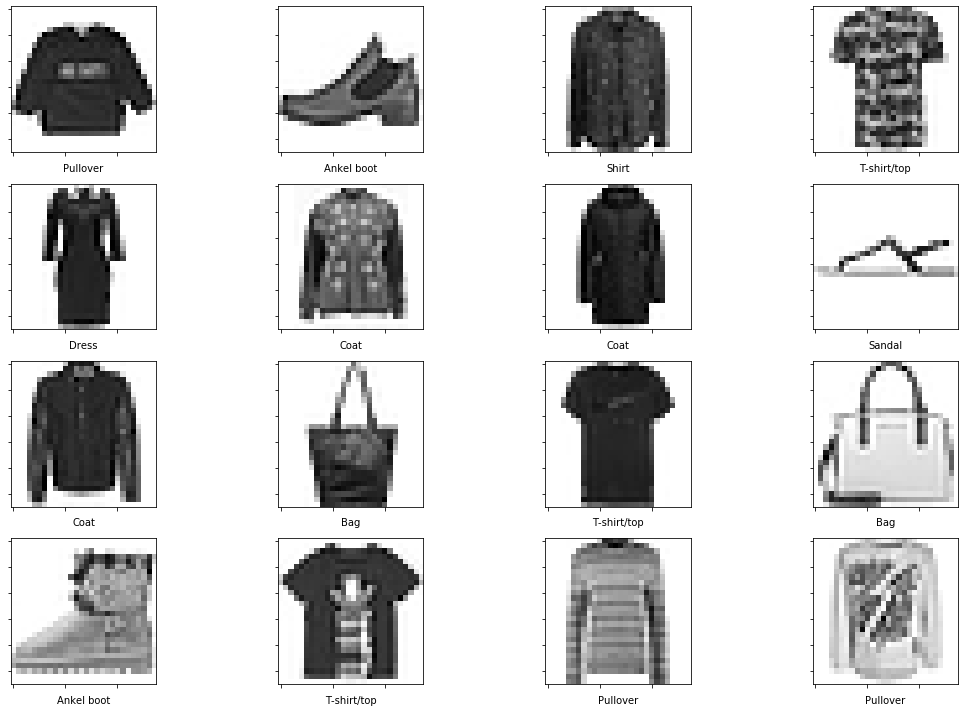

In [14]:
# plotting images
images = np.array([X[i].reshape(28,-1) for i in range(len(X))])
fig,axes = plt.subplots(4, 4, figsize=(15, 10), sharey = False)
fig.tight_layout()
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(images[i], cmap = 'gray_r')
    axes[i].set_xlabel(label_dict[y[i]])
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])

In [15]:
X = X.reshape(-1,28,28,1)
print(np.shape(X))
X = X/255.0

(60000, 28, 28, 1)


In [16]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [17]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [18]:
cnn_model.fit(X,y,batch_size = 64 , epochs = 10 ,validation_data = (x_test,y_test))

Epoch 1/10
938/938 [==============================] - 44s 47ms/step - loss: 0.5018 - accuracy: 0.8243 - val_loss: 58.0316 - val_accuracy: 0.8393
Epoch 2/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3381 - accuracy: 0.8820 - val_loss: 42.7083 - val_accuracy: 0.8658
Epoch 3/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3013 - accuracy: 0.8927 - val_loss: 48.9059 - val_accuracy: 0.8535
Epoch 4/10
938/938 [==============================] - 42s 45ms/step - loss: 0.2800 - accuracy: 0.9002 - val_loss: 50.9560 - val_accuracy: 0.8527
Epoch 5/10
938/938 [==============================] - 41s 44ms/step - loss: 0.2631 - accuracy: 0.9060 - val_loss: 53.0567 - val_accuracy: 0.8484
Epoch 6/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2483 - accuracy: 0.9110 - val_loss: 62.0130 - val_accuracy: 0.8333
Epoch 7/10
938/938 [==============================] - 42s 44ms/step - loss: 0.2373 - accuracy: 0.9150 - val_loss: 51.9888 - val_ac

In [19]:
test_images = x_test.reshape(10000,28,28)

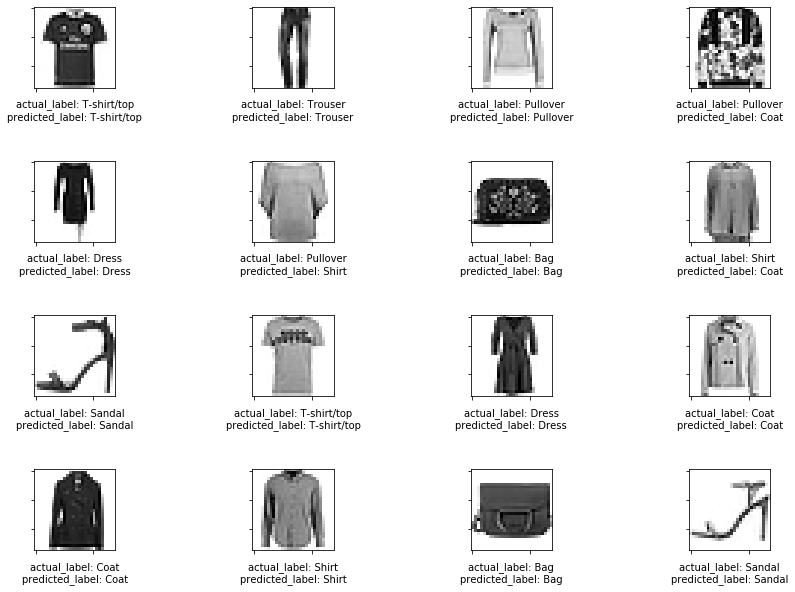

In [20]:
# plotting images with predicted labels)
fig,axes = plt.subplots(4, 4, figsize=(15, 10), sharey = False)
# fig.tight_layout()
plt.subplots_adjust(hspace=0.9)
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(test_images[i], cmap = 'gray_r')
    
    predicted_values = cnn_model.predict(np.expand_dims(x_test[i],0))
    predicted_label = np.argmax(predicted_values)
    axes[i].set_xlabel('actual_label: '+str(label_dict[y_test[i]])+'\n'+
                       'predicted_label: '+str(label_dict[predicted_label]))
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])